In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import InstanceHardnessThreshold

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
IHT = InstanceHardnessThreshold()

In [4]:
res.resample_directory(IHT, path, 'InstanceHardnessThreshold', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/InstanceHardnessThreshold/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/InstanceHardnessThreshold/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 2972 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [10]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model(do_regularization=True)
cnn.summary()

# Fit Model

In [11]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=100)

Epoch 1/100
163/163 [==============================] - 12s 76ms/step - loss: 1.1904 - tp: 4177.0000 - fp: 1007.0000 - tn: 4201.0000 - fn: 1031.0000 - accuracy: 0.8043 - precision: 0.8057 - recall: 0.8020 - auc: 0.8863 - val_loss: 0.8829 - val_tp: 209.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 95.0000 - val_accuracy: 0.6562 - val_precision: 0.6471 - val_recall: 0.6875 - val_auc: 0.7305
Epoch 2/100
163/163 [==============================] - 9s 58ms/step - loss: 0.4552 - tp: 4733.0000 - fp: 478.0000 - tn: 4734.0000 - fn: 479.0000 - accuracy: 0.9082 - precision: 0.9083 - recall: 0.9081 - auc: 0.9704 - val_loss: 0.7513 - val_tp: 228.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 76.0000 - val_accuracy: 0.7812 - val_precision: 0.8000 - val_recall: 0.7500 - val_auc: 0.8145
Epoch 3/100
163/163 [==============================] - 9s 58ms/step - loss: 0.3931 - tp: 4777.0000 - fp: 428.0000 - tn: 4776.0000 - fn: 427.0000 - accuracy: 0.9179 - precision: 0.9178 - recall: 0.9179 - auc: 

Epoch 22/100
163/163 [==============================] - 10s 58ms/step - loss: 0.2243 - tp: 4990.0000 - fp: 225.0000 - tn: 4987.0000 - fn: 222.0000 - accuracy: 0.9571 - precision: 0.9569 - recall: 0.9574 - auc: 0.9924 - val_loss: 0.6825 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8164
Epoch 23/100
163/163 [==============================] - 9s 58ms/step - loss: 0.2198 - tp: 4989.0000 - fp: 213.0000 - tn: 4991.0000 - fn: 215.0000 - accuracy: 0.9589 - precision: 0.9591 - recall: 0.9587 - auc: 0.9918 - val_loss: 0.7198 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8086
Epoch 24/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1887 - tp: 5058.0000 - fp: 151.0000 - tn: 5061.0000 - fn: 154.0000 - accuracy: 0.9707 - precision: 0.9710 - recall: 0.9705 - auc: 

163/163 [==============================] - 9s 57ms/step - loss: 0.1478 - tp: 5093.0000 - fp: 121.0000 - tn: 5091.0000 - fn: 119.0000 - accuracy: 0.9770 - precision: 0.9768 - recall: 0.9772 - auc: 0.9972 - val_loss: 0.4615 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8965
Epoch 43/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1651 - tp: 5044.0000 - fp: 161.0000 - tn: 5043.0000 - fn: 160.0000 - accuracy: 0.9692 - precision: 0.9691 - recall: 0.9693 - auc: 0.9952 - val_loss: 0.4419 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.91410 - tn: 2832.0000 - fn: 102.0000 - accuracy: 0.9649 - precision: 
Epoch 44/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1585 - tp: 5069.0000 - fp: 140.0000 - tn: 5072.0000 - fn: 143.0000 - accuracy: 

Epoch 63/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1477 - tp: 5068.0000 - fp: 143.0000 - tn: 5069.0000 - fn: 144.0000 - accuracy: 0.9725 - precision: 0.9726 - recall: 0.9724 - auc: 0.9958 - val_loss: 0.6821 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8281
Epoch 64/100
163/163 [==============================] - 10s 58ms/step - loss: 0.1626 - tp: 5047.0000 - fp: 159.0000 - tn: 5049.0000 - fn: 161.0000 - accuracy: 0.9693 - precision: 0.9695 - recall: 0.9691 - auc: 0.9949 - val_loss: 0.5626 - val_tp: 209.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 95.0000 - val_accuracy: 0.7188 - val_precision: 0.7333 - val_recall: 0.6875 - val_auc: 0.8809
Epoch 65/100
163/163 [==============================] - 9s 57ms/step - loss: 0.1416 - tp: 5074.0000 - fp: 136.0000 - tn: 5072.0000 - fn: 134.0000 - accuracy: 0.9741 - precision: 0.9739 - recall: 0.9743 - auc: 

Epoch 84/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1445 - tp: 5057.0000 - fp: 156.0000 - tn: 5056.0000 - fn: 155.0000 - accuracy: 0.9702 - precision: 0.9701 - recall: 0.9703 - auc: 0.9957 - val_loss: 0.6277 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8711
Epoch 85/100
163/163 [==============================] - 9s 57ms/step - loss: 0.1352 - tp: 5077.0000 - fp: 131.0000 - tn: 5077.0000 - fn: 131.0000 - accuracy: 0.9748 - precision: 0.9748 - recall: 0.9748 - auc: 0.9968 - val_loss: 0.5868 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8711
Epoch 86/100
163/163 [==============================] - 10s 60ms/step - loss: 0.1241 - tp: 5091.0000 - fp: 116.0000 - tn: 5092.0000 - fn: 117.0000 - accuracy: 0.9776 - precision: 0.9777 - recall: 0.9775 - auc: 

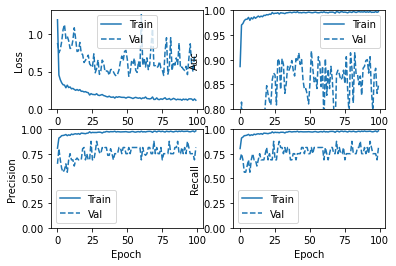

In [12]:
cnn.plot_history()

In [13]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.59      0.97      0.74       234
   PNEUMONIA       0.97      0.59      0.74       390

    accuracy                           0.74       624
   macro avg       0.78      0.78      0.74       624
weighted avg       0.83      0.74      0.74       624



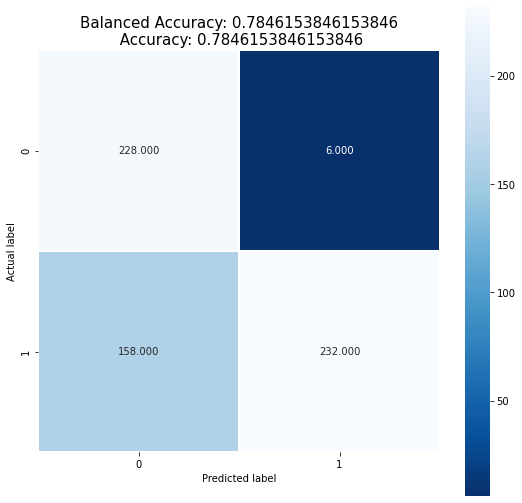

In [14]:
cnn.display_confusion_matrix(test_set)